In [1]:
import pandas as pd
import numpy as np  # For mathematical calculations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import warnings  # To ignore any warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.keys()
print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [6]:
# print data_types for each variables
print(train.dtypes)
print(train.shape, test.shape)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(614, 13) (367, 12)


In [7]:
# Analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

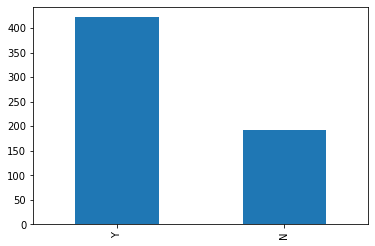

In [8]:
# Normalise can be set to true to print the proportions instead of Numbers.
train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Gender'}>

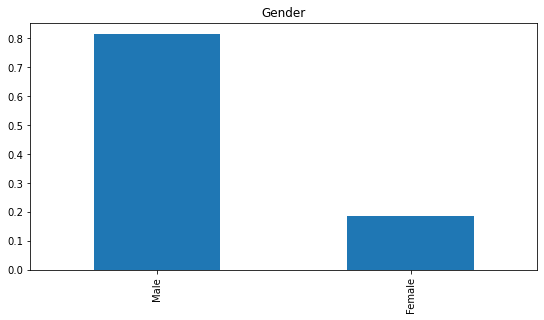

In [9]:

# visualize each variable separately
# Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
# Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
# Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,
# Loan_Amount_Term)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Gender')

<AxesSubplot:title={'center':'Married'}>

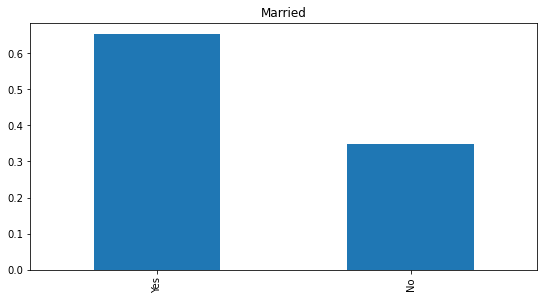

In [10]:
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Married')

<AxesSubplot:title={'center':'Self_Employed'}>

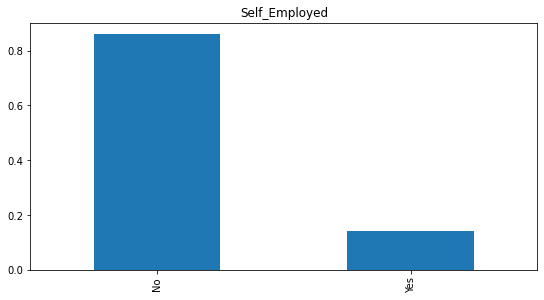

In [11]:
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Self_Employed')

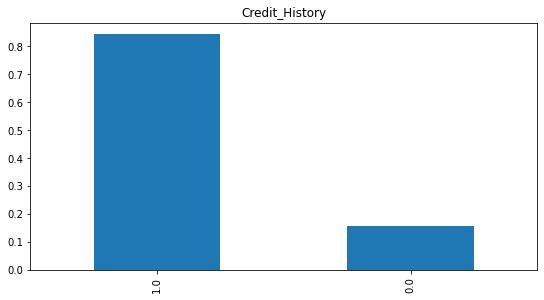

In [12]:
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Credit_History')
plt.show()


<AxesSubplot:title={'center':'Dependents'}>

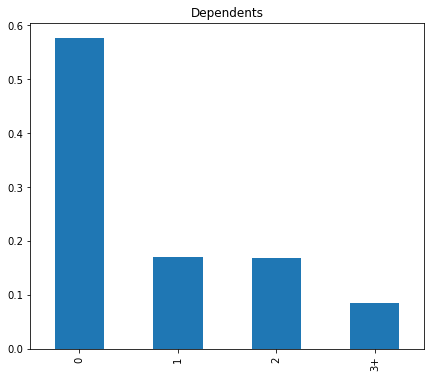

In [13]:
# let’s visualize the ordinal variables.

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24, 6), title='Dependents')

<AxesSubplot:title={'center':'Education'}>

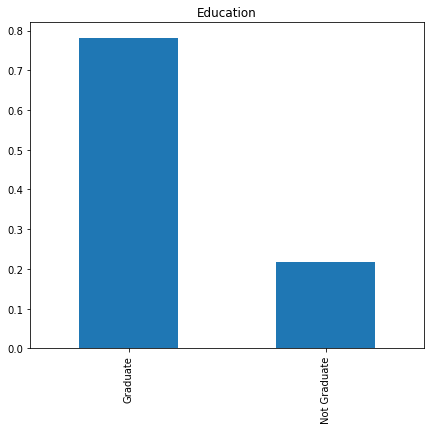

In [14]:
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24, 6), title='Education')


<AxesSubplot:title={'center':'Property_Area'}>

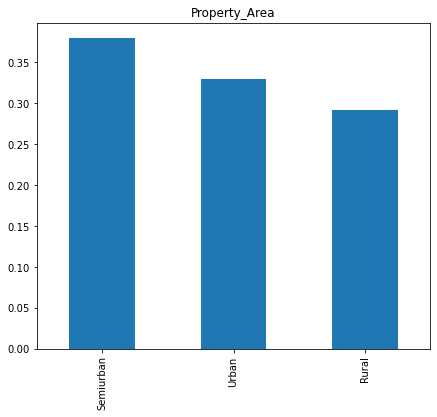

In [15]:
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24, 6), title='Property_Area')
# Lets visualise Numerical data

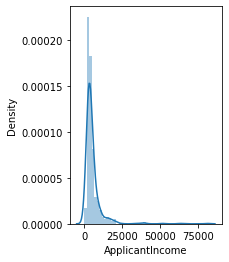

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);


<AxesSubplot:>

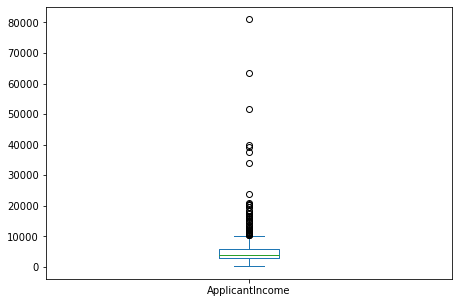

In [17]:
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16, 5))


Text(0.5, 0.98, '')

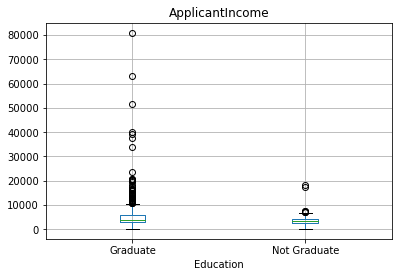

In [18]:
# The boxplot confirms the presence of a lot of extreme values.
# This can be attributed to the income disparity in the society.
# this can be driven by the fact that we are looking at people with different education levels.
# Let us segregate them by Education:

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

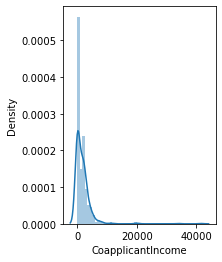

In [19]:
# Let’s look at the Coapplicant income distribution.

plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])


<AxesSubplot:>

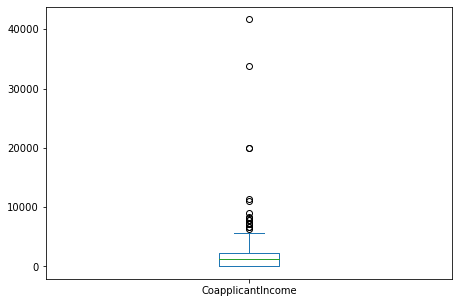

In [20]:
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16, 5))


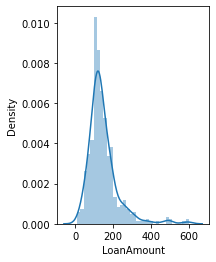

In [21]:
# Let’s look at the distribution of LoanAmount variable.

plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);


<AxesSubplot:>

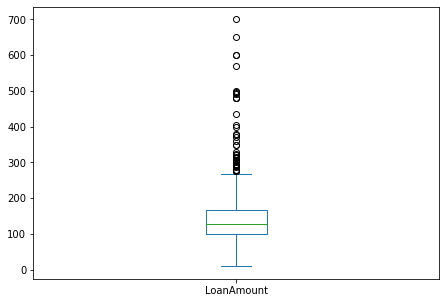

In [22]:
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16, 5))


In [23]:
# Missing Values and Outliers Treatements

train.info()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount,
# Loan_Amount_Term and Credit_History features.
# 1) We will treat the missing values in all the features one by one.
# 2) We can consider these methods to fill the missing values:

# a)For numerical variables: imputation using mean or median
# b)For categorical variables: imputation using mode

# There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so,
# we can fill them using the mode of the features.

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [25]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# let’s try to find a way to fill the missing values in Loan_Amount_Term.
# We will look at the value count of the Loan amount term variable.

train['Loan_Amount_Term'].value_counts()
# It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the
# missing values in this variable using the mode of this variable.
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
# As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in
# the test dataset too with the same approach.

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


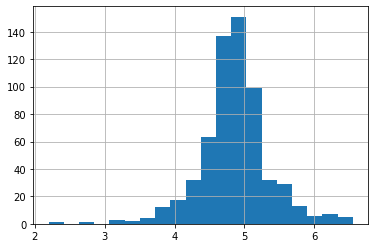

In [28]:
# Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [29]:
# Bivariate Analysis
# Categorical Independent Variable vs Target Variable
# First of all we will find the relation between target variable and categorical independent variables.
# Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

train.describe()
train.shape

(614, 14)

In [30]:
train.dropna()
train.shape

(614, 14)

<AxesSubplot:xlabel='Gender'>

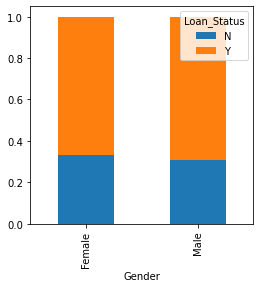

In [31]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))


In [32]:
# It can be inferred that the proportion of male and female applicants is more or less same
# for both approved and unapproved loans.
# Now let us visualize the remaining categorical variables vs target variable.

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

<AxesSubplot:xlabel='Married'>

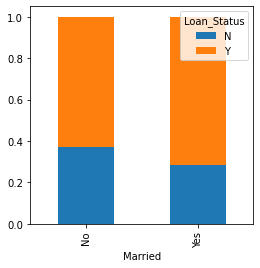

In [33]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4, 4))


<AxesSubplot:xlabel='Dependents'>

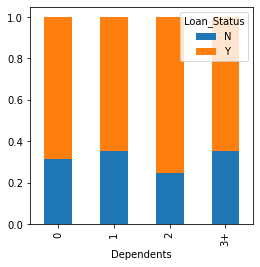

In [34]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4, 4))


<AxesSubplot:xlabel='Education'>

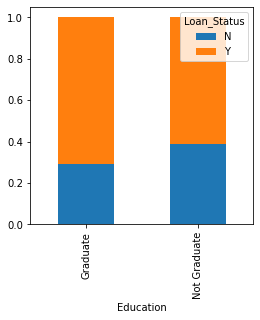

In [35]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))

<AxesSubplot:xlabel='Self_Employed'>

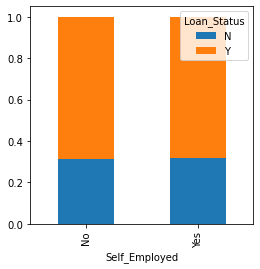

In [36]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))

In [37]:
# Lets look at the relationship between remaining categorical independent variables and Loan_Status.

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])


<AxesSubplot:xlabel='Credit_History'>

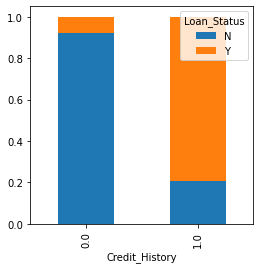

In [38]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4, 4))

<AxesSubplot:xlabel='Property_Area'>

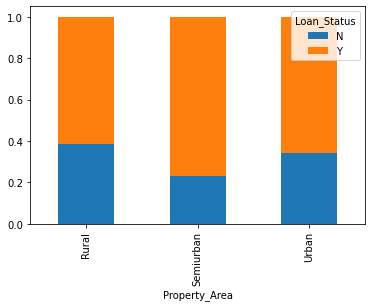

In [39]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Loan_Status'>

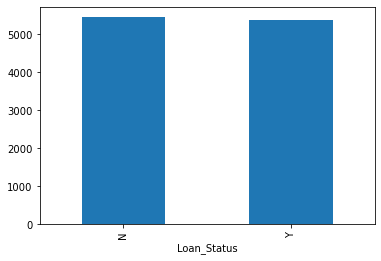

In [40]:

#  let’s visualize numerical independent variables with respect to target variable.
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


In [41]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['HIgh', 'Average', 'Low', 'Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, right=True, labels=group)

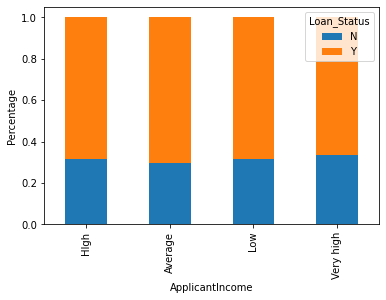

In [42]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

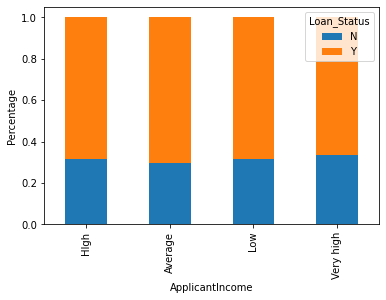

In [43]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

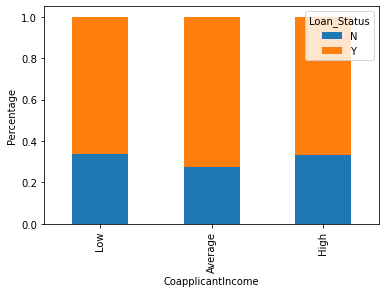

In [44]:
# We will analyze the coapplicant income and loan amount variable in similar manner.

bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, include_lowest=True, labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

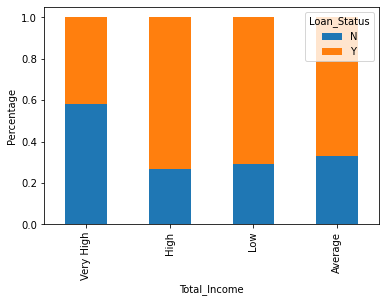

In [45]:
# Let us combine the Applicant Income and Coapplicant Income and see the combined effect of
# Total Income on the Loan_Status.

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Very High', 'High', 'Low', 'Average']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [46]:
# Let’s visualize the Loan amount variable.

bins = [0, 100, 200, 700]
group = ['Average', 'Low', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)


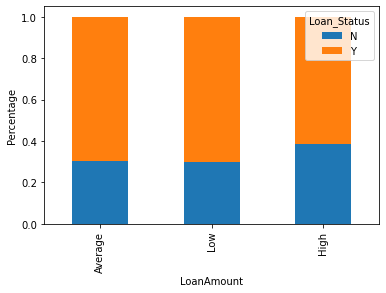

In [47]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')


In [48]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'],
                   axis=1)

In [49]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)


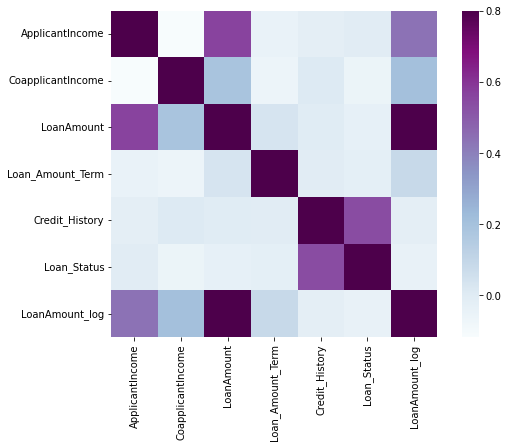

In [50]:
# lets look at the correlation between all the numerical variables
# The variables with darker color means their correlation is more.

matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


In [51]:
# Model Building : Part I
# Let us make our model to predict the target variable.
# We will start with Logistic Regression which is used for predicting binary outcome.
# Lets drop the Loan_ID variable as it do not have any effect on the loan status

train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [52]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [53]:
# we will make dummy variables for the categorical variables

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [54]:
# We will use the train_test_split function from sklearn to divide our train dataset.


from sklearn.model_selection import train_test_split


In [55]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [56]:
# The dataset has been divided into training and validation part.
# Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
# Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv = model.predict(x_cv)

In [59]:
# Let us calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv, pred_cv)


0.7783783783783784

In [60]:
# Let’s make predictions for the test dataset.

pred_test = model.predict(test)

In [61]:
# Lets import the submission file which we have to submit on the solution checker.

submission = pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [62]:
# We only need the Loan_ID and the corresponding Loan_Status for the final submission.
# we will fill these columns with the Loan_ID of test dataset and the predictions that we made

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [89]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,N
4,LP001051,Y


In [63]:
# Logistic Regression using stratified k-folds cross validation

from sklearn.model_selection import StratifiedKFold

In [64]:
# Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [65]:
# The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.
from sklearn import metrics


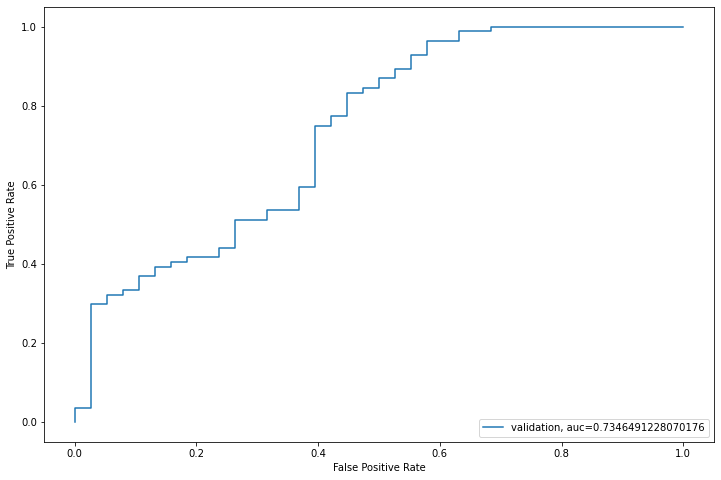

In [66]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="validation, auc=" + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

In [67]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
# Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.


In [68]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)


In [69]:
# Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic1.csv')

In [70]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']


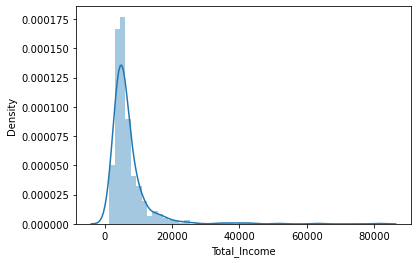

In [71]:
# Let’s check the distribution of Total Income.

sns.distplot(train['Total_Income']);
# let’s take the log transformation to make the distribution normal.


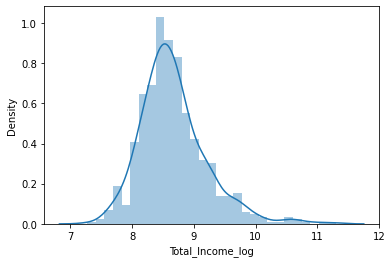

In [72]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [73]:
# Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.
# Let’s create the EMI feature now.

train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']


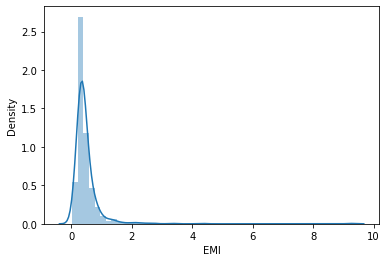

In [74]:
# Let’s check the distribution of EMI variable.
sns.distplot(train['EMI']);


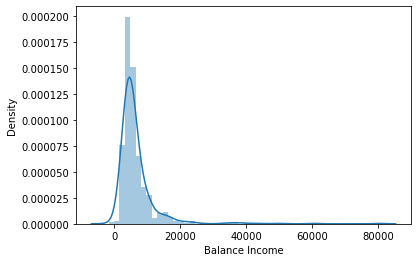

In [75]:
# Let us create Balance Income feature now and check its distribution.

train['Balance Income'] = train['Total_Income'] - (train['EMI'] * 1000)  # Multiply with 1000 to make the units equal
test['Balance Income'] = test['Total_Income'] - (test['EMI'] * 1000)
sns.distplot(train['Balance Income']);

In [76]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [77]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [78]:
# Logistic Regression

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [79]:
submission['Loan_Status'] = pred_test  # filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']  # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Log2.csv')

In [80]:
from sklearn import tree


In [81]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
pred_test = model.predict(test)



1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [82]:
submission['Loan_Status'] = pred_test  # filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']  # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Decision Tree.csv')

In [83]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [84]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [85]:
# We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and
# n_estimators decides the number of trees that will be used in random forest model.

from sklearn.model_selection import GridSearchCV


In [86]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an
# interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)
# Fit the grid search model
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [88]:
GridSearchCV(cv=None, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                              max_depth=None, max_features='auto', max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1, min_samples_split=2,
                                              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=1, verbose=0, warm_start=False),
             fit_params=None, iid=True, n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'fit_params'

In [ ]:
# Estimating the optimized value
grid_search.best_estimator_

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0, warm_start=False)

In [ ]:
# So, the optimized value for the max_depth variable is 3 and for n_estimator is 41.
# Now let’s build the model using these optimized values.

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i += 1
pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:, 1]

In [ ]:
submission['Loan_Status'] = pred_test  # filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']  # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Random Forest.csv')


In [ ]:
# Let us find the feature importance now, i.e. which features are most important for this problem.
# We will use featureimportances attribute of sklearn to do so.

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12, 8))


In [ ]:
plt.show()